<p style="font-size:36px;text-align:center"> <b>Jigsaw Unintended Bias in Toxicity Classification</b> </p>

## 1. Business Problem

### Source : https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification
### Problem Statement : 
#### Classify the given comments based on toxicity level. If target > .5 label as 1 (Toxic) else 0 ( Intoxic )

### 1.1 Background


At the end of 2017 the Civil Comments platform shut down and chose make their ~2m public comments from their platform available in a lasting open archive so that researchers could understand and improve civility in online conversations for years to come. Jigsaw sponsored this effort and extended annotation of this data by human raters for various toxic conversational attributes.

In the data supplied for this competition, the text of the individual comment is found in the comment_text column. Each comment in Train has a toxicity label (target), and models should predict the target toxicity for the Test data. This attribute (and all others) are fractional values which represent the fraction of human raters who believed the attribute applied to the given comment. For evaluation, test set examples with target >= 0.5 will be considered to be in the positive class (toxic).

The data also has several additional toxicity subtype attributes. Models do not need to predict these attributes for the competition, they are included as an additional avenue for research. Subtype attributes are:

severe_toxicity
obscene
threat
insult
identity_attack
sexual_explicit
Additionally, a subset of comments have been labelled with a variety of identity attributes, representing the identities that are mentioned in the comment. The columns corresponding to identity attributes are listed below. Only identities with more than 500 examples in the test set (combined public and private) will be included in the evaluation calculation. These identities are shown in bold.

male
female
transgender
other_gender
heterosexual
homosexual_gay_or_lesbian
bisexual
other_sexual_orientation
christian
jewish
muslim
hindu
buddhist
atheist
other_religion
black
white
asian
latino
other_race_or_ethnicity
physical_disability
intellectual_or_learning_disability
psychiatric_or_mental_illness
other_disability
Note that the data contains different comments that can have the exact same text. Different comments that have the same text may have been labeled with different targets or subgroups.

### 1.2. Real-world/Business objectives and constraints.

* No low-latency requirement.
* Interpretability is important.
* Sentiment Analysis of the comments has to be done.
* Probability of a data-point belonging to each class is needed.

# 2. Machine Learning Problem Formulation

## 2.1. Data

### 2.1.1. Data Overview

* We have two data files: In the data supplied for problem, the text of the individual comment is found in the comment_text column. Each comment in Train has a toxicity label (target), and models should predict the target toxicity for the Test data.
* Data file's information:

* train.csv : ('id', 'target', 'comment_text', 'severe_toxicity', 'obscene','identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability',      'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count')

* test.csv : ('id', 'comment_text')

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# 3) Exploratory Data Analysis

### 3.1) Reading train and test dataset

In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the train data into pandas dataframe
# df_train = pd.read_csv('drive/My Drive/Jigsaw-CaseStudy/train.csv')
df_train = pd.read_csv('train.csv')

# We have 1.8 millions of data record in train dataset with 45 features given
print("Train dataframe shape:", df_train.shape)
df_train.head(5)

Train dataframe shape: (1804874, 45)


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [3]:
df_train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [4]:
# Loading the test data into pandas dataframe
# df_test = pd.read_csv('drive/My Drive/Jigsaw-CaseStudy/test.csv')
df_test = pd.read_csv('test.csv')

# We have 10k of data record in test dataset 
print("Test dataframe shape:", df_test.shape)
df_test.head(5)

Test dataframe shape: (97320, 2)


,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


### 3.2) Processing required columns from train dataset

In [5]:
# For our case study we will focus on the comment_text data and rest of the columns we will ignore

df_train = df_train[['id','target','comment_text']]
df_train.head(5)

,id,target,comment_text
0,59848,0.000000,"This is so cool. It's like, 'would you want yo..."
1,59849,0.000000,Thank you!! This would make my life a lot less...
2,59852,0.000000,This is such an urgent design problem; kudos t...
3,59855,0.000000,Is this something I'll be able to install on m...
4,59856,0.893617,haha you guys are a bunch of losers.


### 3.3) Preparing the Y label for train dataset

In [6]:
# Function to assign the binary class as y label

def assign_class(target):
    if target >= .5:
        return 1
    else: 
        return 0

In [7]:
# we will create binary class column which will be our Y label

df_train['class'] = df_train.apply(lambda x: assign_class(x['target']), axis= 1)
df_train.head(5)

,id,target,comment_text,class
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0
3,59855,0.000000,Is this something I'll be able to install on m...,0
4,59856,0.893617,haha you guys are a bunch of losers.,1


In [8]:
# Total number of points with class 1 = 1,44,334 lakh

print("\nTotal number of points in both classes:")
df_train['class'].value_counts()


Total number of points in both classes:


0    1660540
1     144334
Name: class, dtype: int64

### 3.4) Univariate analysis on target column

<Figure size 720x720 with 0 Axes>

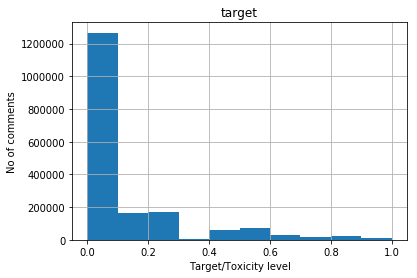

In [9]:
# EDA on target variable

fig = plt.figure(figsize=(10,10))
df_train.hist(column='target')
plt.xlabel("Target/Toxicity level")
plt.ylabel("No of comments")
plt.show()

#####  Conclusion : The train dataset given is highly imbalanced. there is less comments with toxicity > .5

<Figure size 720x720 with 0 Axes>

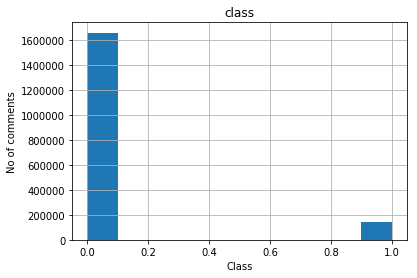

In [10]:
# EDA on class variable

fig = plt.figure(figsize=(10,10))
df_train.hist(column='class')
plt.xlabel("Class")
plt.ylabel("No of comments")
plt.show()

### 3.5) Sampling the Train and Test data for our analysis

In [11]:
import numpy as np

# Sampling the data such that both classes have equal number of datapoints in train dataset.

# https://stackoverflow.com/questions/56191448/sample-pandas-dataframe-based-on-values-in-column

df_train_sampled = df_train.groupby('class').apply(lambda x: x.sample(n=70000)).reset_index(drop = True)

print('\n Number of datapoints in each class :\n')
print(df_train_sampled['class'].value_counts())

print("\n The shape of train data is : ",df_train_sampled.shape)


 Number of datapoints in each class :

1    70000
0    70000
Name: class, dtype: int64

 The shape of train data is :  (140000, 4)


In [12]:
df_train_sampled.head(5)

,id,target,comment_text,class
0,5725613,0.200000,Lock em up... throw away the key.,0
1,5173568,0.000000,"Take a deep but wide look at France, UK. I see...",0
2,5080958,0.000000,He's just ego driven and senses a responsibili...,0
3,5122956,0.166667,"""Stephen Harper has also used omnibus bills to...",0
4,636984,0.400000,Silent majority my a$$. The overwhelming major...,0


## 4) Pre-processing train and test Commnet text data

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import string
import re
from nltk.stem.snowball import SnowballStemmer

def pre_process_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    
    ## Clean the text
    text = re.sub("[^a-zA-Z0-9\n]", " ", text) # removing special characters    
    text = re.sub("what's", "what is ", text) # decontracting the phrase    
    text = re.sub("\'ve", " have ", text) 
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am ", text)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("[.!#?]"," ", text)        
    text = re.sub("\s+"," ", text) # replace multiple spaces with single space
    
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [22]:
import warnings
warnings.filterwarnings("ignore")

# Apply the preprocess text function to the train and test dataset

# Train dataset

df_train_sampled.comment_text.fillna(" ",inplace=True)

df_train_sampled['comment_text'] = df_train_sampled.comment_text.apply(lambda x: pre_process_text(x))
    
# Test dataset

df_test.comment_text.fillna(" ",inplace=True)

df_test['comment_text'] = df_test.comment_text.apply(lambda x: pre_process_text(x))

In [26]:
df_train_sampled.head(10)

,id,target,comment_text,class
0,5725613,0.200000,lock up throw away key,0
1,5173568,0.000000,take deep wide look franc uk see futur u s bot...,0
2,5080958,0.000000,he s ego driven sens respons carri campaign pr...,0
3,5122956,0.166667,stephen harper also use omnibus bill prevent p...,0
4,636984,0.400000,silent major a overwhelm major canadian agre y...,0
5,5526924,0.200000,superb book destin war graham allison speak el...,0
6,441016,0.000000,worth fear decis base archaic contradictori wr...,0
7,5601271,0.000000,mors inspir washington investig publish two pe...,0
8,742555,0.000000,alreadi arctic port capabl export lng big prof...,0
9,5266688,0.000000,perhap aga khan ask stay away sinc trudeau s c...,0


In [27]:
df_test.head(10)

,id,comment_text
0,7097320,integr mean pay debt doe appli presid trump too
1,7097321,malfeas administr board wast money
2,7097322,rmiller101 spoken like true elitist look bud r...
3,7097323,paul thank kind word do inde strong belief hid...
4,7097324,sorri miss high school eisenhow sent troop vie...
5,7097325,let s see understand this berkowitz announc 14...
6,7097326,oil read presid take differ tactic deal corrup...
7,7097327,work togeth dream on liber alreadi busi creat ...
8,7097328,would jerri prevo think stori exact think his
9,7097329,wil indigen account take respons instead blame...


In [28]:
# Save the preprocessed train and test comment text into csv 

df_train_sampled.to_csv('G:\\Ipynotebook\\jigsaw-unintended-bias-in-toxicity-classification\\train_preprocessV1.csv',index=False)
df_test.to_csv('G:\\Ipynotebook\\jigsaw-unintended-bias-in-toxicity-classification\\test_preprocessV1.csv',index=False)

### Taking the preprocessed train and test into pandas dataframe stored in drive

In [29]:
df_train_sampled = pd.read_csv('train_preprocessV1.csv')
df_test = pd.read_csv('test_preprocessV1.csv')

In [30]:
df_train_sampled.head(2)

,id,target,comment_text,class
0,5725613,0.2,lock up throw away key,0
1,5173568,0.0,take deep wide look franc uk see futur u s bot...,0


In [31]:
df_test.head(2)

,id,comment_text
0,7097320,integr mean pay debt doe appli presid trump too
1,7097321,malfeas administr board wast money


## Topic modeling ( Unsupervised Clustering Method )
#### 1) LDA ( Latent Dirichlet Allocation ) is an unsupervised machine-learning model that automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making.
#### 2) we will model our comment_text into 5 different topics and then take these topics as features in train and test data for our supervised classification model.

### 4.1) Tokenize word and clean up text

In [32]:
# References for Topic Modeling : 
# 1) https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# 2) https://nlpforhackers.io/topic-modeling/
# 3) https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

data = df_train_sampled.comment_text.values.tolist()

In [33]:
import gensim
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings("ignore")

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['lock', 'up', 'throw', 'away', 'key']]


### 4.2) Create the Dictionary and Corpus needed for Topic Modeling

In [34]:
from gensim import corpora

# Create Dictionary
dictionary = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in texts]

# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [35]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('away', 1), ('key', 1), ('lock', 1), ('throw', 1), ('up', 1)]]

### 4.3) Building topic model

In [42]:
import warnings
warnings.filterwarnings("ignore")

from gensim.models import LdaModel

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1,
                                           chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [63]:
# Save a model to disk

lda_model.save("G:\\Ipynotebook\\jigsaw-unintended-bias-in-toxicity-classification\\lda_model.model")

In [64]:
# load model from disk

lda_model.load("G:\\Ipynotebook\\jigsaw-unintended-bias-in-toxicity-classification\\lda_model.model")

In [65]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5310667744171627


In [44]:
# Print the Keyword in the 5 topics

print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.024*"like" + 0.016*"stupid" + 0.014*"it" + 0.012*"that" + 0.012*"know" + 0.012*"say" + 0.011*"right" + 0.010*"make" + 0.010*"you" + 0.009*"think"'), (1, '0.054*"trump" + 0.015*"vote" + 0.015*"presid" + 0.013*"support" + 0.013*"he" + 0.012*"black" + 0.012*"comment" + 0.012*"american" + 0.010*"elect" + 0.010*"women"'), (2, '0.024*"govern" + 0.023*"state" + 0.021*"money" + 0.019*"tax" + 0.018*"pay" + 0.011*"million" + 0.010*"busi" + 0.010*"job" + 0.009*"alaska" + 0.009*"system"'), (3, '0.024*"peopl" + 0.018*"get" + 0.016*"would" + 0.016*"one" + 0.011*"time" + 0.011*"white" + 0.010*"want" + 0.009*"need" + 0.009*"even" + 0.008*"idiot"'), (4, '0.023*"countri" + 0.016*"lie" + 0.016*"world" + 0.012*"muslim" + 0.012*"canada" + 0.012*"fool" + 0.012*"canadian" + 0.009*"war" + 0.008*"murder" + 0.008*"corrupt"')]


In [45]:
# Visualize the topics on train

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
 
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.228637 -0.297879       1        1  33.149094
0      0.247276  0.331098       2        1  29.797672
1     -0.201213 -0.001223       3        1  15.542610
4     -0.250577  0.065287       4        1  11.533054
2     -0.024122 -0.097282       5        1   9.977578, topic_info=     Category          Freq     Term         Total  loglift  logprob
term                                                                
188   Default  31881.000000    trump  31881.000000  30.0000  30.0000
494   Default  30051.000000    peopl  30051.000000  29.0000  29.0000
309   Default  27263.000000     like  27263.000000  28.0000  28.0000
255   Default  22284.000000      get  22284.000000  27.0000  27.0000
639   Default  20513.000000    would  20513.000000  26.0000  26.0000
17    Default  10288.000000  countri  10288.000000  25.0000  25.0000
2844  Default  18052.000000   stupid  18052.000000  24.0000  24.0000
471   Default   8987.000000   govern   8987.000000  23.0000  23.0000
492   Default  20566.000000      one  20566.000000  22.0000  22.0000
477   Default  16277.000000       it  16277.000000  21.0000  21.0000
879   Default   9749.000000    state   9749.000000  20.0000  20.0000
57    Default   8152.000000    money   8152.000000  19.0000  19.0000
328   Default  14065.000000     that  14065.000000  18.0000  18.0000
530   Default   9063.000000     vote   9063.000000  17.0000  17.0000
588   Default   8978.000000   presid   8978.000000  16.0000  16.0000
172   Default  13719.000000     know  13719.000000  15.0000  15.0000
380   Default   7190.000000      tax   7190.000000  14.0000  14.0000
318   Default  13419.000000      say  13419.000000  13.0000  13.0000
2268  Default   7188.000000      lie   7188.000000  12.0000  12.0000
797   Default   6720.000000      pay   6720.000000  11.0000  11.0000
86    Default   7142.000000    world   7142.000000  10.0000  10.0000
212   Default  12517.000000    right  12517.000000   9.0000   9.0000
424   Default  13462.000000     time  13462.000000   8.0000   8.0000
1345  Default  13256.000000    white  13256.000000   7.0000   7.0000
538   Default   7852.000000  support   7852.000000   6.0000   6.0000
92    Default   7542.000000       he   7542.000000   5.0000   5.0000
3478  Default   7311.000000    black   7311.000000   4.0000   4.0000
1762  Default   7292.000000  comment   7292.000000   3.0000   3.0000
504   Default  12043.000000     want  12043.000000   2.0000   2.0000
146   Default  10849.000000      you  10849.000000   1.0000   1.0000
...       ...           ...      ...           ...      ...      ...
797    Topic5   6719.328613      pay   6720.135254   2.3047  -4.0350
411    Topic5   4292.204590  million   4293.021484   2.3046  -4.4832
889    Topic5   3801.755127     busi   3802.566406   2.3046  -4.6045
223    Topic5   3346.808350   alaska   3347.617676   2.3046  -4.7320
601    Topic5   3322.553467   system   3323.367188   2.3046  -4.7392
130    Topic5   3156.715088  control   3157.535889   2.3046  -4.7904
1248   Topic5   2765.949951   garbag   2766.769775   2.3045  -4.9226
272    Topic5   2694.337891      oil   2695.138916   2.3045  -4.9488
1038   Topic5   2612.471191  citizen   2613.288818   2.3045  -4.9797
970    Topic5   2562.577148      cut   2563.384277   2.3045  -4.9990
793    Topic5   2558.780762     cost   2559.588867   2.3045  -5.0004
969    Topic5   2535.371826  compani   2536.178467   2.3045  -5.0096
398    Topic5   2547.389404    death   2548.210449   2.3045  -5.0049
1529   Topic5   2385.485596      buy   2386.296631   2.3045  -5.0706
143    Topic5   2162.823730     save   2163.637207   2.3045  -5.1686
303    Topic5   2091.999756     fund   2092.805420   2.3044  -5.2019
999    Topic5   2072.102539    spend   2072.906738   2.3044  -5.2114
1618   Topic5   2084.604492     plan   2085.416504   2.3044  -5.2054
416    Topic5   2032.415894     paid   2033.223389   2.3044 

### 4.4) Testing model

In [46]:
data = df_test.comment_text.values.tolist()
test_words = list(sent_to_words(data)) # corpus

print(test_words[:1])

# Term Document Frequency
test_corpus = [dictionary.doc2bow(text) for text in test_words]

[['integr', 'mean', 'pay', 'debt', 'doe', 'appli', 'presid', 'trump', 'too']]


In [48]:
vis = pyLDAvis.gensim.prepare(lda_model, test_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.228637 -0.297879       1        1  33.229370
0      0.247276  0.331098       2        1  29.404306
1     -0.201213 -0.001223       3        1  14.573937
4     -0.250577  0.065287       4        1  11.426856
2     -0.024122 -0.097282       5        1  11.365535, topic_info=     Category          Freq     Term         Total  loglift  logprob
term                                                                
188   Default  21103.000000    trump  21103.000000  30.0000  30.0000
494   Default  21265.000000    peopl  21265.000000  29.0000  29.0000
309   Default  18992.000000     like  18992.000000  28.0000  28.0000
255   Default  15769.000000      get  15769.000000  27.0000  27.0000
639   Default  14516.000000    would  14516.000000  26.0000  26.0000
471   Default   7227.000000   govern   7227.000000  25.0000  25.0000
17    Default   7196.000000  countri   7196.000000  24.0000  24.0000
2844  Default  12575.000000   stupid  12575.000000  23.0000  23.0000
879   Default   7685.000000    state   7685.000000  22.0000  22.0000
492   Default  14548.000000      one  14548.000000  21.0000  21.0000
57    Default   6555.000000    money   6555.000000  20.0000  20.0000
477   Default  11339.000000       it  11339.000000  19.0000  19.0000
380   Default   5781.000000      tax   5781.000000  18.0000  18.0000
328   Default   9798.000000     that   9798.000000  17.0000  17.0000
797   Default   5403.000000      pay   5403.000000  16.0000  16.0000
172   Default   9557.000000     know   9557.000000  15.0000  15.0000
530   Default   5999.000000     vote   5999.000000  14.0000  14.0000
588   Default   5943.000000   presid   5943.000000  13.0000  13.0000
318   Default   9348.000000      say   9348.000000  12.0000  12.0000
2268  Default   5027.000000      lie   5027.000000  11.0000  11.0000
86    Default   4995.000000    world   4995.000000  10.0000  10.0000
212   Default   8720.000000    right   8720.000000   9.0000   9.0000
424   Default   9526.000000     time   9526.000000   8.0000   8.0000
1345  Default   9380.000000    white   9380.000000   7.0000   7.0000
538   Default   5198.000000  support   5198.000000   6.0000   6.0000
92    Default   4992.000000       he   4992.000000   5.0000   5.0000
504   Default   8522.000000     want   8522.000000   4.0000   4.0000
3478  Default   4839.000000    black   4839.000000   3.0000   3.0000
1762  Default   4826.000000  comment   4826.000000   2.0000   2.0000
146   Default   7558.000000      you   7558.000000   1.0000   1.0000
...       ...           ...      ...           ...      ...      ...
797    Topic5   5403.208008      pay   5403.766113   2.1745  -4.0350
411    Topic5   3451.486572  million   3452.051758   2.1744  -4.4832
889    Topic5   3057.102051     busi   3057.663330   2.1744  -4.6045
223    Topic5   2691.266113   alaska   2691.826172   2.1744  -4.7320
601    Topic5   2671.762207   system   2672.325439   2.1744  -4.7392
130    Topic5   2538.406494  control   2538.974365   2.1744  -4.7904
1248   Topic5   2224.180908   garbag   2224.748047   2.1743  -4.9226
272    Topic5   2166.595703      oil   2167.149902   2.1743  -4.9488
1038   Topic5   2100.764160  citizen   2101.329834   2.1743  -4.9797
970    Topic5   2060.642822      cut   2061.201416   2.1743  -4.9990
793    Topic5   2057.590332     cost   2058.149414   2.1743  -5.0004
969    Topic5   2038.766479  compani   2039.324585   2.1743  -5.0096
398    Topic5   2048.430176    death   2048.998291   2.1743  -5.0049
1529   Topic5   1918.238525      buy   1918.799805   2.1743  -5.0706
143    Topic5   1739.189697     save   1739.752686   2.1743  -5.1686
303    Topic5   1682.238037     fund   1682.795532   2.1743  -5.2019
999    Topic5   1666.238037    spend   1666.794556   2.1743  -5.2114
1618   Topic5   1676.291260     plan   1676.853149   2.1742  -5.2054
416    Topic5   1634.324951     paid   1634.883667   2.1742 

### 4.5) Converting Topics to Feature Vectors

In [68]:
# For train vectors

train_vecs = []

for i in range(len(df_train_sampled)):
    top_train_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_train_vec = [top_train_topics[i][1] for i in range(5)]
    train_vecs.append(topic_train_vec)

In [74]:
# Printing top five train vectors
train_vecs[:5]

[[0.2882819, 0.13556118, 0.061539482, 0.4201912, 0.09442624],
 [0.22495371, 0.0941024, 0.05121491, 0.34279495, 0.28693402],
 [0.31476548, 0.3125868, 0.07818849, 0.21936993, 0.07508932],
 [0.24627858, 0.14256154, 0.092500135, 0.4629514, 0.055708375],
 [0.35396627, 0.13490164, 0.23071125, 0.18115357, 0.09926729]]

In [75]:
# For test vectors

test_vecs = []

for i in range(len(df_test)):
    top_test_topics = lda_model.get_document_topics(test_corpus[i], minimum_probability=0.0)
    topic_test_vec = [top_test_topics[i][1] for i in range(5)]
    test_vecs.append(topic_test_vec)

In [76]:
# Printing top five test vectors
test_vecs[:5]

[[0.28090692, 0.21438031, 0.11778517, 0.30461445, 0.08231315],
 [0.24867706, 0.24588312, 0.098337, 0.31266576, 0.09443708],
 [0.33497143, 0.2413414, 0.041726857, 0.26860183, 0.11335848],
 [0.45562252, 0.2111888, 0.014229257, 0.2538773, 0.06508211],
 [0.18760405, 0.2430036, 0.05841568, 0.27097645, 0.24000019]]

### 4.6) Merging the topic vectors into train and test dataframe

In [96]:
# Create the new df with 5 topics and then merge with the original train and test dataframe

df1 = pd.DataFrame(train_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])
df_train_sampled = pd.concat([df_train_sampled, df1], axis=1, join='inner')

df2 = pd.DataFrame(test_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])
df_test = pd.concat([df_test, df2], axis=1, join='inner')

In [97]:
df_train_sampled.head(5)

,id,target,comment_text,class,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,5725613,0.200000,lock up throw away key,0,0.288282,0.135561,0.061539,0.420191,0.094426
1,5173568,0.000000,take deep wide look franc uk see futur u s bot...,0,0.224954,0.094102,0.051215,0.342795,0.286934
2,5080958,0.000000,he s ego driven sens respons carri campaign pr...,0,0.314765,0.312587,0.078188,0.219370,0.075089
3,5122956,0.166667,stephen harper also use omnibus bill prevent p...,0,0.246279,0.142562,0.092500,0.462951,0.055708
4,636984,0.400000,silent major a overwhelm major canadian agre y...,0,0.353966,0.134902,0.230711,0.181154,0.099267


In [98]:
df_test.head(5)

,id,comment_text,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5
0,7097320,integr mean pay debt doe appli presid trump too,0.280907,0.214380,0.117785,0.304614,0.082313
1,7097321,malfeas administr board wast money,0.248677,0.245883,0.098337,0.312666,0.094437
2,7097322,rmiller101 spoken like true elitist look bud r...,0.334971,0.241341,0.041727,0.268602,0.113358
3,7097323,paul thank kind word do inde strong belief hid...,0.455623,0.211189,0.014229,0.253877,0.065082
4,7097324,sorri miss high school eisenhow sent troop vie...,0.187604,0.243004,0.058416,0.270976,0.240000


## 5) Feature Engineering 

### 5.1) Calculating sentiment score of comments in train and test set

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# ******************************************* Sentiment analysis for train data
text_NegScore = []
text_NeuScore = []
text_PosScore = []
text_compoundScore = []

for stmt in tqdm(df_train_sampled.comment_text.values):
    
    ss = sid.polarity_scores(str(stmt))
    text_NegScore.append(ss["neg"])
    text_NeuScore.append(ss["neu"])
    text_PosScore.append(ss["pos"])
    text_compoundScore.append(ss["compound"])

# Assigning the score to the train text
df_train_sampled['text_NegScore'] = text_NegScore
df_train_sampled['text_NeuScore'] = text_NeuScore
df_train_sampled['text_PosScore'] = text_PosScore
df_train_sampled['text_compoundScore'] = text_compoundScore

# ******************************************** Sentiment analysis for test data
text_NegScore = []
text_NeuScore = []
text_PosScore = []
text_compoundScore = []
    
for stmt in tqdm(df_test.comment_text.values):
    
    ss = sid.polarity_scores(str(stmt))
    text_NegScore.append(ss["neg"])
    text_NeuScore.append(ss["neu"])
    text_PosScore.append(ss["pos"])
    text_compoundScore.append(ss["compound"])

# Assigning the score to the test text data
df_test['text_NegScore'] = text_NegScore
df_test['text_NeuScore'] = text_NeuScore
df_test['text_PosScore'] = text_PosScore
df_test['text_compoundScore'] = text_compoundScore

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


100%|██████████████████████████████████████████████████████████████████████████| 97320/97320 [00:29<00:00, 3325.51it/s]


In [100]:
df_train_sampled.head(5)

,id,target,comment_text,class,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,text_NegScore,text_NeuScore,text_PosScore,text_compoundScore
0,5725613,0.200000,lock up throw away key,0,0.288282,0.135561,0.061539,0.420191,0.094426,0.000,1.000,0.000,0.0000
1,5173568,0.000000,take deep wide look franc uk see futur u s bot...,0,0.224954,0.094102,0.051215,0.342795,0.286934,0.153,0.682,0.165,0.5305
2,5080958,0.000000,he s ego driven sens respons carri campaign pr...,0,0.314765,0.312587,0.078188,0.219370,0.075089,0.000,1.000,0.000,0.0000
3,5122956,0.166667,stephen harper also use omnibus bill prevent p...,0,0.246279,0.142562,0.092500,0.462951,0.055708,0.076,0.880,0.044,-0.2023
4,636984,0.400000,silent major a overwhelm major canadian agre y...,0,0.353966,0.134902,0.230711,0.181154,0.099267,0.055,0.742,0.203,0.6808


In [101]:
df_test.head(5)

,id,comment_text,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,text_NegScore,text_NeuScore,text_PosScore,text_compoundScore
0,7097320,integr mean pay debt doe appli presid trump too,0.280907,0.214380,0.117785,0.304614,0.082313,0.358,0.642,0.000,-0.4404
1,7097321,malfeas administr board wast money,0.248677,0.245883,0.098337,0.312666,0.094437,0.000,1.000,0.000,0.0000
2,7097322,rmiller101 spoken like true elitist look bud r...,0.334971,0.241341,0.041727,0.268602,0.113358,0.000,0.751,0.249,0.6486
3,7097323,paul thank kind word do inde strong belief hid...,0.455623,0.211189,0.014229,0.253877,0.065082,0.143,0.681,0.176,0.8402
4,7097324,sorri miss high school eisenhow sent troop vie...,0.187604,0.243004,0.058416,0.270976,0.240000,0.272,0.568,0.160,-0.6486


### 5.2) Calculating length of the text comment

In [102]:
# Count of the length if comment for train and test dataset

WrdCnt_trn = []; # the avg-w2v for each sentence/review is stored in this list
WrdCnt_test = [];

df_train_sampled.comment_text.fillna(" ",inplace=True)
df_test.comment_text.fillna(" ",inplace=True)

# For train data
for sentence in tqdm(df_train_sampled['comment_text'].values): # for each review/sentence
    cnt_words = 0; # num of words with a valid vector in the sentence/review
    cnt_words = sentence.split() # for each word in a review/sentence
    WrdCnt_trn.append(len(cnt_words))
    
# For test data
for sentence in tqdm(df_test['comment_text'].values): # for each review/sentence
    cnt_words = 0; # num of words with a valid vector in the sentence/review
    cnt_words = sentence.split() # for each word in a review/sentence
    WrdCnt_test.append(len(cnt_words))

print("Length of Comment text in train dataset :", len(WrdCnt_trn))
print("Length of Comment text in test dataset :", len(WrdCnt_test))

100%|████████████████████████████████████████████████████████████████████████| 97320/97320 [00:00<00:00, 527094.89it/s]


Length of Comment text in train dataset : 140000
Length of Comment text in test dataset : 97320


In [103]:
df_train_sampled['Comment_Len'] = WrdCnt_trn
df_test['Comment_Len'] = WrdCnt_test

In [104]:
df_train_sampled.head(2)

,id,target,comment_text,class,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,text_NegScore,text_NeuScore,text_PosScore,text_compoundScore,Comment_Len
0,5725613,0.2,lock up throw away key,0,0.288282,0.135561,0.061539,0.420191,0.094426,0.000,1.000,0.000,0.0000,5
1,5173568,0.0,take deep wide look franc uk see futur u s bot...,0,0.224954,0.094102,0.051215,0.342795,0.286934,0.153,0.682,0.165,0.5305,99


In [105]:
df_test.head(2)

,id,comment_text,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,text_NegScore,text_NeuScore,text_PosScore,text_compoundScore,Comment_Len
0,7097320,integr mean pay debt doe appli presid trump too,0.280907,0.214380,0.117785,0.304614,0.082313,0.358,0.642,0.0,-0.4404,9
1,7097321,malfeas administr board wast money,0.248677,0.245883,0.098337,0.312666,0.094437,0.000,1.000,0.0,0.0000,5


##  6) Machine Learning 

### 6.1) Train and Cross Validate  split

In [106]:
from sklearn.model_selection import train_test_split

# Taking class as y label in differnt dataset and then dropping the target and class from train dataset.
Y_train = df_train_sampled['class']
df_train_sampled.drop(columns=['target','class'], axis=1, inplace=True)

# split the train data into train and cross validation by maintaining same distribution of output varaible 'Y_train' [stratify=Y_train]
# Train : cross validate ratio = 70 : 30

train_df, cv_df, y_train, y_cv = train_test_split(df_train_sampled, Y_train, stratify=Y_train, test_size=0.30)

In [107]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])
print('Number of data points of Y label in train data:', y_train.shape[0])
print('Number of data points of Y label in cross validation data:', y_cv.shape[0])

Number of data points in train data: 98000
Number of data points in cross validation data: 42000
Number of data points of Y label in train data: 98000
Number of data points of Y label in cross validation data: 42000


### 6.2) TFIDF Vectorization on comment text for Train, Test and Cross Validate

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(1,5),max_features=2000)

tfidf_train = tfidf_vect.fit_transform(train_df['comment_text'])
tfidf_cv = tfidf_vect.transform(cv_df['comment_text'])
tfidf_test = tfidf_vect.transform(df_test['comment_text'])

print('shape of train TFIDF vector : ', tfidf_train.shape)
print('shape of cross validate TFIDF vector : ', tfidf_cv.shape)
print('shape of test TFIDF vector : ', tfidf_test.shape)

shape of train TFIDF vector :  (98000, 2000)
shape of cross validate TFIDF vector :  (42000, 2000)
shape of test TFIDF vector :  (97320, 2000)


### 6.3) Vectorization of sentiment analysis scores in train and cross validate

In [109]:
# Vectorizing neg score 

from sklearn.preprocessing import MinMaxScaler

Neg_scaler = MinMaxScaler()

Neg_scaler.fit(train_df['text_NegScore'].values.reshape(-1,1))

neg_train = Neg_scaler.transform(train_df['text_NegScore'].values.reshape(-1,1))
neg_cv = Neg_scaler.transform(cv_df['text_NegScore'].values.reshape(-1,1))
neg_test = Neg_scaler.transform(df_test['text_NegScore'].values.reshape(-1,1))

print('Shape of neg_train :', neg_train.shape)
print('Shape of neg_cv :', neg_cv.shape)
print('Shape of neg_test :', neg_test.shape)

Shape of neg_train : (98000, 1)
Shape of neg_cv : (42000, 1)
Shape of neg_test : (97320, 1)


In [110]:
# Vectorizing pos score 

from sklearn.preprocessing import MinMaxScaler

Pos_scaler = MinMaxScaler()

Pos_scaler.fit(train_df['text_PosScore'].values.reshape(-1,1))

pos_train = Pos_scaler.transform(train_df['text_PosScore'].values.reshape(-1,1))
pos_cv = Pos_scaler.transform(cv_df['text_PosScore'].values.reshape(-1,1))
pos_test = Pos_scaler.transform(df_test['text_PosScore'].values.reshape(-1,1))

print('Shape of pos_train :', pos_train.shape)
print('Shape of pos_cv :', pos_cv.shape)
print('Shape of pos_test :', pos_test.shape)

Shape of pos_train : (98000, 1)
Shape of pos_cv : (42000, 1)
Shape of pos_test : (97320, 1)


In [111]:
# Vectorizing neu score 

from sklearn.preprocessing import MinMaxScaler

Neu_scaler = MinMaxScaler()

Neu_scaler.fit(train_df['text_NeuScore'].values.reshape(-1,1))

neu_train = Neu_scaler.transform(train_df['text_NeuScore'].values.reshape(-1,1))
neu_cv = Neu_scaler.transform(cv_df['text_NeuScore'].values.reshape(-1,1))
neu_test = Neu_scaler.transform(df_test['text_NeuScore'].values.reshape(-1,1))

print('Shape of neu_train :', neu_train.shape)
print('Shape of neu_cv :', neu_cv.shape)
print('Shape of neu_test :', neu_test.shape)

Shape of neu_train : (98000, 1)
Shape of neu_cv : (42000, 1)
Shape of neu_test : (97320, 1)


In [112]:
# Vectorizing compound score 

from sklearn.preprocessing import MinMaxScaler

Comp_scaler = MinMaxScaler()

Comp_scaler.fit(train_df['text_compoundScore'].values.reshape(-1,1))

comp_train = Comp_scaler.transform(train_df['text_compoundScore'].values.reshape(-1,1))
comp_cv = Comp_scaler.transform(cv_df['text_compoundScore'].values.reshape(-1,1))
comp_test = Comp_scaler.transform(df_test['text_compoundScore'].values.reshape(-1,1))

print('Shape of comp_train :', comp_train.shape)
print('Shape of comp_cv :', comp_cv.shape)
print('Shape of comp_test :', comp_test.shape)

Shape of comp_train : (98000, 1)
Shape of comp_cv : (42000, 1)
Shape of comp_test : (97320, 1)


### 6.4) Vectorizing Comment length

In [113]:
# Vectorizing compound score 

from sklearn.preprocessing import StandardScaler

Len_scaler = StandardScaler()

Len_scaler.fit(train_df['Comment_Len'].values.reshape(-1,1))
Len_scaler.fit(cv_df['Comment_Len'].values.reshape(-1,1))
Len_scaler.fit(df_test['Comment_Len'].values.reshape(-1,1))

len_train = Len_scaler.transform(train_df['Comment_Len'].values.reshape(-1,1))
len_cv = Len_scaler.transform(cv_df['Comment_Len'].values.reshape(-1,1))
len_test = Len_scaler.transform(df_test['Comment_Len'].values.reshape(-1,1))

print('Shape of comp_train :', len_train.shape)
print('Shape of comp_cv :', len_cv.shape)
print('Shape of comp_test :', len_test.shape)

Shape of comp_train : (98000, 1)
Shape of comp_cv : (42000, 1)
Shape of comp_test : (97320, 1)


### 6.5) Vectorizing topic columns

In [114]:
# Vectorizing topic-1

from sklearn.preprocessing import StandardScaler

topic_scaler = StandardScaler()

topic_scaler.fit(train_df['Topic-1'].values.reshape(-1,1))
topic_scaler.fit(cv_df['Topic-1'].values.reshape(-1,1))
topic_scaler.fit(df_test['Topic-1'].values.reshape(-1,1))

topic1_train = topic_scaler.transform(train_df['Topic-1'].values.reshape(-1,1))
topic1_cv = topic_scaler.transform(cv_df['Topic-1'].values.reshape(-1,1))
topic1_test = topic_scaler.transform(df_test['Topic-1'].values.reshape(-1,1))

print('Shape of topic1_train :', topic1_train.shape)
print('Shape of topic1_cv :', topic1_cv.shape)
print('Shape of topic1_test :', topic1_test.shape)

Shape of topic1_train : (98000, 1)
Shape of topic1_cv : (42000, 1)
Shape of topic1_test : (97320, 1)


In [115]:
# Vectorizing topic-2

topic_scaler.fit(train_df['Topic-2'].values.reshape(-1,1))
topic_scaler.fit(cv_df['Topic-2'].values.reshape(-1,1))
topic_scaler.fit(df_test['Topic-2'].values.reshape(-1,1))

topic2_train = topic_scaler.transform(train_df['Topic-2'].values.reshape(-1,1))
topic2_cv = topic_scaler.transform(cv_df['Topic-2'].values.reshape(-1,1))
topic2_test = topic_scaler.transform(df_test['Topic-2'].values.reshape(-1,1))

print('Shape of topic2_train :', topic2_train.shape)
print('Shape of topic2_cv :', topic2_cv.shape)
print('Shape of topic2_test :', topic2_test.shape)

Shape of topic2_train : (98000, 1)
Shape of topic2_cv : (42000, 1)
Shape of topic2_test : (97320, 1)


In [118]:
# Vectorizing topic-3

topic_scaler.fit(train_df['Topic-3'].values.reshape(-1,1))
topic_scaler.fit(cv_df['Topic-3'].values.reshape(-1,1))
topic_scaler.fit(df_test['Topic-3'].values.reshape(-1,1))

topic3_train = topic_scaler.transform(train_df['Topic-3'].values.reshape(-1,1))
topic3_cv = topic_scaler.transform(cv_df['Topic-3'].values.reshape(-1,1))
topic3_test = topic_scaler.transform(df_test['Topic-3'].values.reshape(-1,1))

print('Shape of topic3_train :', topic3_train.shape)
print('Shape of topic3_cv :', topic3_cv.shape)
print('Shape of topic3_test :', topic3_test.shape)

Shape of topic3_train : (98000, 1)
Shape of topic3_cv : (42000, 1)
Shape of topic3_test : (97320, 1)


In [116]:
# Vectorizing topic-4

topic_scaler.fit(train_df['Topic-4'].values.reshape(-1,1))
topic_scaler.fit(cv_df['Topic-4'].values.reshape(-1,1))
topic_scaler.fit(df_test['Topic-4'].values.reshape(-1,1))

topic4_train = topic_scaler.transform(train_df['Topic-4'].values.reshape(-1,1))
topic4_cv = topic_scaler.transform(cv_df['Topic-4'].values.reshape(-1,1))
topic4_test = topic_scaler.transform(df_test['Topic-4'].values.reshape(-1,1))

print('Shape of topic4_train :', topic4_train.shape)
print('Shape of topic4_cv :', topic4_cv.shape)
print('Shape of topic4_test :', topic4_test.shape)

Shape of topic4_train : (98000, 1)
Shape of topic4_cv : (42000, 1)
Shape of topic4_test : (97320, 1)


In [117]:
# Vectorizing topic-5

topic_scaler.fit(train_df['Topic-5'].values.reshape(-1,1))
topic_scaler.fit(cv_df['Topic-5'].values.reshape(-1,1))
topic_scaler.fit(df_test['Topic-5'].values.reshape(-1,1))

topic5_train = topic_scaler.transform(train_df['Topic-5'].values.reshape(-1,1))
topic5_cv = topic_scaler.transform(cv_df['Topic-5'].values.reshape(-1,1))
topic5_test = topic_scaler.transform(df_test['Topic-5'].values.reshape(-1,1))

print('Shape of topic5_train :', topic5_train.shape)
print('Shape of topic5_cv :', topic5_cv.shape)
print('Shape of topic5_test :', topic5_test.shape)

Shape of topic5_train : (98000, 1)
Shape of topic5_cv : (42000, 1)
Shape of topic5_test : (97320, 1)


### 6.5) Merging all the features

In [119]:
from scipy.sparse import hstack

X_train = hstack((tfidf_train,neg_train,neu_train,pos_train,comp_train,len_train,topic1_train,topic2_train,topic3_train,topic4_train,topic5_train))
X_cv = hstack((tfidf_cv,neg_cv,neu_cv,pos_cv,comp_cv,len_cv,topic1_cv,topic2_cv,topic3_cv,topic4_cv,topic5_cv))
X_test = hstack((tfidf_test,neg_test,neu_test,pos_test,comp_test,len_test,topic1_test,topic2_test,topic3_test,topic4_test,topic5_test))

print("Shape of X train dataset : ", X_train.shape)
print("Shape of CV dataset : ", X_cv.shape)
print("Shape of X test dataset : ", X_test.shape)

Shape of X train dataset :  (98000, 2010)
Shape of CV dataset :  (42000, 2010)
Shape of X test dataset :  (97320, 2010)


## 7) Logistic Regression Model

### 7.1) Hyperparameter tuning for Logistic Regression


for alpha = 1e-08
Log Loss of CV : 0.41668673721378185

for alpha = 1e-07
Log Loss of CV : 0.4321146967261984

for alpha = 1e-06
Log Loss of CV : 0.43082204239810423

for alpha = 1e-05
Log Loss of CV : 0.39602725582535103

for alpha = 0.0001
Log Loss of CV : 0.4181462237531971

for alpha = 0.001
Log Loss of CV : 0.5378674068954763

for alpha = 0.01
Log Loss of CV : 0.6089163604391875

for alpha = 0.1
Log Loss of CV : 0.6479240818195409

for alpha = 1
Log Loss of CV : 0.6633622609451172

for alpha = 10
Log Loss of CV : 0.6662396520133426

for alpha = 100
Log Loss of CV : 0.6665801425094038


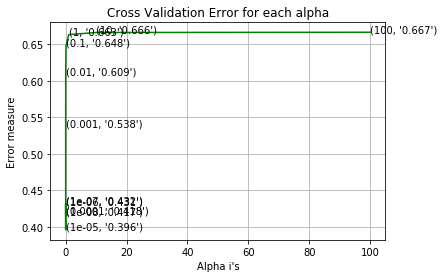


The best alpha is :  1e-05


In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
import warnings
warnings.filterwarnings("ignore")

alpha = [10 ** x for x in range(-8, 3)]
cv_log_error_array = []
for i in alpha:
    print("\nfor alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss of CV :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
print("\nThe best alpha is : ",alpha[best_alpha])

### 7.2) Confusion matrix for Cross Validate

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confusion_matrixas_HeatMap(confusion_matrix):
    col = ["Predicted project rejected","Prediction project approved"]
    ind = ["Actual project rejected","Actual project approved"]
    df_cm = pd.DataFrame(confusion_matrix, index=ind, columns=col)
    fig = plt.figure(figsize=(4,4))
    plt.close()
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    return fig

<Figure size 288x288 with 0 Axes>

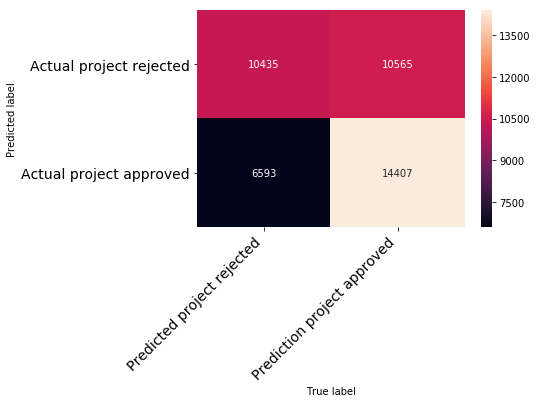

In [123]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix for cross validate data

y_predictedCV = sig_clf.predict(X_cv)
cm = confusion_matrix(y_cv, y_predictedCV)
plot_confusion_matrixas_HeatMap(cm)

### 7.3) Receiver operating characteristic (ROC) curve

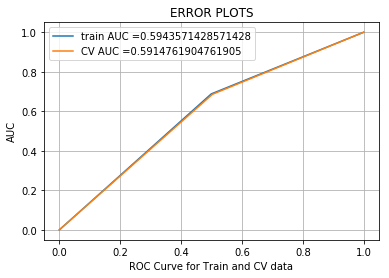

In [124]:
from sklearn.metrics import roc_curve, auc

y_predictedtrain = sig_clf.predict(X_train)
y_predictedCV = sig_clf.predict(X_cv)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_predictedtrain)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_predictedCV)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("ROC Curve for Train and CV data")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## 8) Testing the model

In [125]:
from sklearn.metrics import confusion_matrix

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

y_predicted_test = sig_clf.predict(X_test)
y_predict_proba_test = sig_clf.predict_proba(X_test)

print(y_predicted_test[:20])

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [126]:
df_test['comment_text'][7] 

'work togeth dream on liber alreadi busi creat next scandal crime accus presid trump sinc lose polici debat everi time snivel statist traitor ground dirt never ever let qwest destroy countri mean avail sure'

In [127]:
# Scores for traning and cross validate data

print(sig_clf.score(X=X_train,y=y_train))
print(sig_clf.score(X=X_cv,y=y_cv))

0.8405510204081633
0.8321190476190476


In [128]:
print(y_predict_proba_test)

[[0.84518576 0.15481424]
 [0.73954805 0.26045195]
 [0.79896495 0.20103505]
 ...
 [0.81166511 0.18833489]
 [0.33395895 0.66604105]
 [0.91555654 0.08444346]]


In [129]:
# Merging the predicted Y class and probability to the test dataframe

df_test['Y_Predicted_class'] = list(y_predicted_test)
df_test['Y_predictClass_probability'] = list(y_predict_proba_test)

In [130]:
df_test.head(20)

,id,comment_text,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,text_NegScore,text_NeuScore,text_PosScore,text_compoundScore,Comment_Len,Y_Predicted_class,Y_predictClass_probability
0,7097320,integr mean pay debt doe appli presid trump too,0.280907,0.214380,0.117785,0.304614,0.082313,0.358,0.642,0.000,-0.4404,9,0,"[0.8451857561609457, 0.15481424383905426]"
1,7097321,malfeas administr board wast money,0.248677,0.245883,0.098337,0.312666,0.094437,0.000,1.000,0.000,0.0000,5,0,"[0.739548053041451, 0.26045194695854895]"
2,7097322,rmiller101 spoken like true elitist look bud r...,0.334971,0.241341,0.041727,0.268602,0.113358,0.000,0.751,0.249,0.6486,18,0,"[0.7989649515741338, 0.20103504842586628]"
3,7097323,paul thank kind word do inde strong belief hid...,0.455623,0.211189,0.014229,0.253877,0.065082,0.143,0.681,0.176,0.8402,101,0,"[0.8425833829012106, 0.15741661709878943]"
4,7097324,sorri miss high school eisenhow sent troop vie...,0.187604,0.243004,0.058416,0.270976,0.240000,0.272,0.568,0.160,-0.6486,33,0,"[0.8123087373271365, 0.18769126267286348]"
5,7097325,let s see understand this berkowitz announc 14...,0.188055,0.068528,0.238741,0.382697,0.121979,0.000,0.846,0.154,0.8979,80,0,"[0.7500868663311184, 0.24991313366888154]"
6,7097326,oil read presid take differ tactic deal corrup...,0.265763,0.216136,0.068971,0.360366,0.088764,0.234,0.766,0.000,-0.6369,19,1,"[0.04118796671656333, 0.9588120332834368]"
7,7097327,work togeth dream on liber alreadi busi creat ...,0.175877,0.155650,0.079265,0.486930,0.102278,0.324,0.583,0.093,-0.8934,34,1,"[0.3716110448860346, 0.6283889551139654]"
8,7097328,would jerri prevo think stori exact think his,0.368264,0.155240,0.055441,0.336004,0.085050,0.000,1.000,0.000,0.0000,8,0,"[0.8933022905622799, 0.10669770943771995]"
9,7097329,wil indigen account take respons instead blame...,0.304088,0.107805,0.117821,0.336683,0.133603,0.275,0.725,0.000,-0.4215,12,0,"[0.8315710159286976, 0.16842898407130236]"


In [131]:
df_test.to_csv('G:\\Ipynotebook\\jigsaw-unintended-bias-in-toxicity-classification\\test_resultV1.csv',index=False)